### Python金融风控策略实战（基于Jupyter Notebook）
## <center>IPython+Hadoop+Spark >>> 架构配置 + RDD运算</center>
### <center>策略制定及验证：张君颖  ； 报告日期：2020.12.14</center>
<font color=blue><center>本报告不构成投资建议，转载需注明作者且不得删改</center></font>   
  
<font color=blue><center>作者邮箱：zhang.jun.ying@outlook.com</center></font>   
  
<font color=blue><center>项目源代码、数据、自定义函数已上传GitHub：</center></font>   
    
<font color=blue><center>https://github.com/lotbear/Python-Financial-investment-strategy</center></font>


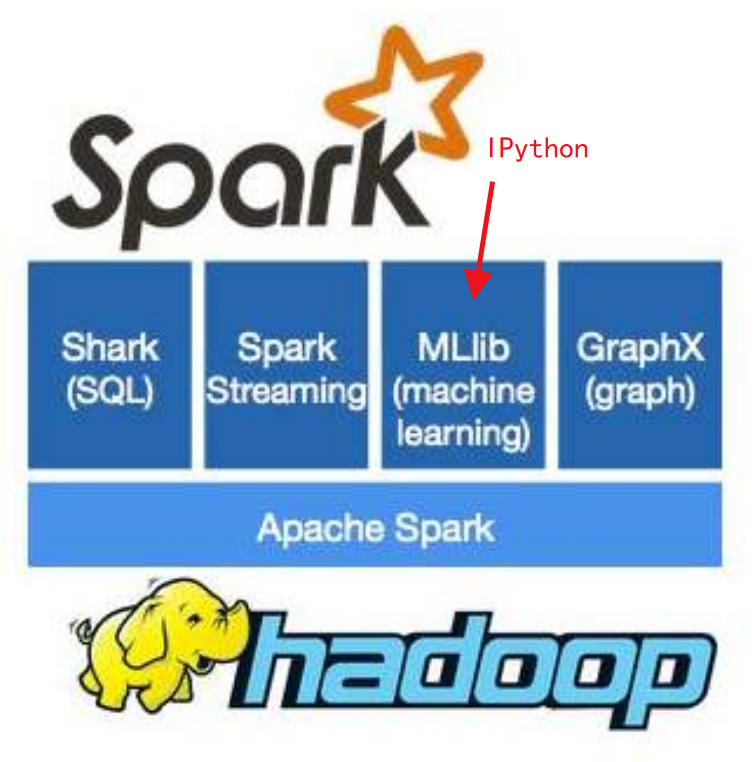   

### 大数据软件架构 版本配置汇总：

系统 Linux.Ubuntu 20.10-desktop-amd64   

语言 Java 11.0.9.1   

分布式存储 Hadoop 3.3.0    

下载地址：http://mirror.bit.edu.cn/apache/hadoop/common/hadoop-3.3.0/  

语言 Scala 2.12.10   

分布式计算 spark-3.0.1-bin-hadoop3.2   

下载地址：https://www.apache.org/dyn/closer.lua/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz   

Anaconda-Ipython 数据科学：Anaconda3-5.3.1-Linux-x86_64.sh.qbm   
(python=3.7.0，IPython=6.5.0)   

下载地址：https://mirrors.tuna.tsinghua.edu.cn/anaconda/archive/  

### 环境变量配置： 

增加环境变量，终端输入：sudo gedit ~/.bashrc  

<font color=blue>( HOME 路径配置，要查看不同软件包的安装路径 )</font>  

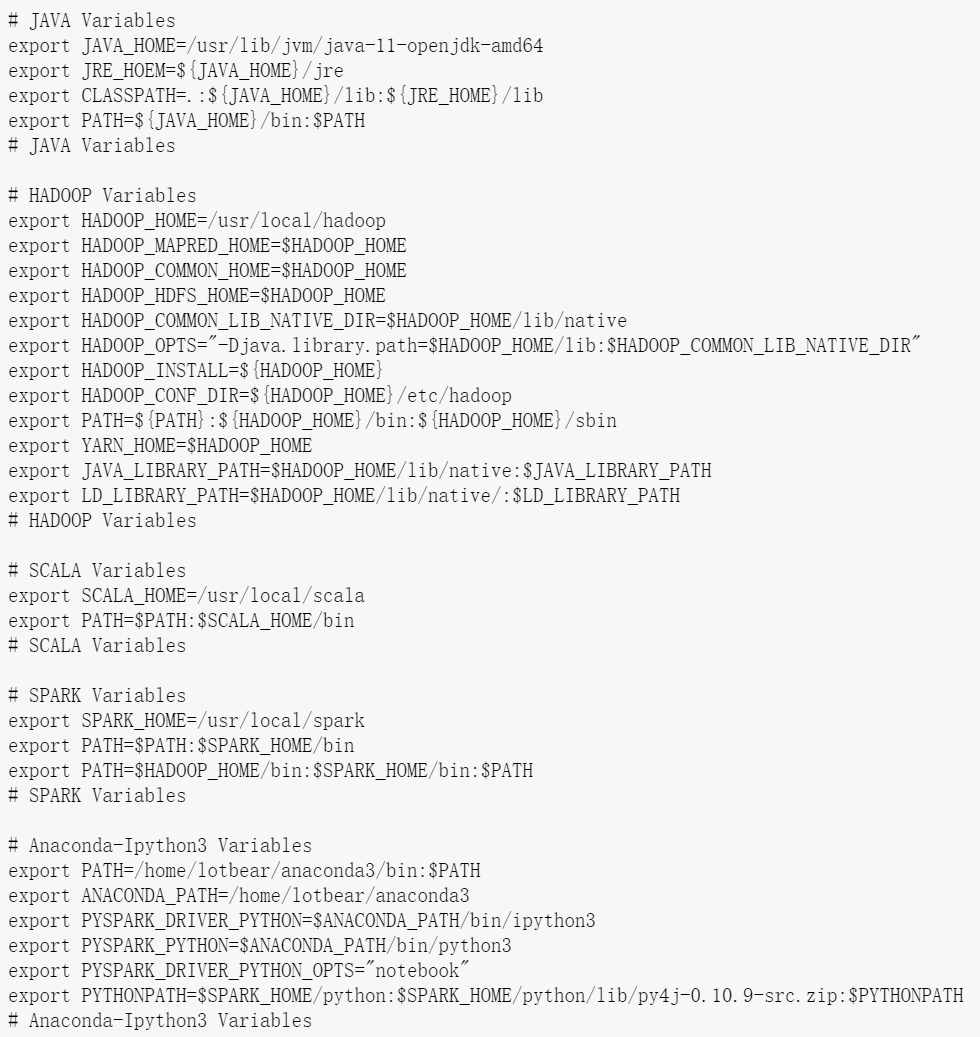

环境变量增加完后，终端输入：source ~/.bashrc  使环境变量设置生效   

完成以上软件架构配置后，在终端输入：pyspark    

可直接进入 Jupyter Notebook 页面，进行基于 Hadoop + Spark 的分布式数据存储/运算的数据科学工作   

<font color=red><center>本次报告仅介绍基础 RDD 的 map-reduce 分布式数据运算操作</center></font>

### RDD ( Resilient Distributed Dataset ) 弹性分布式数据集
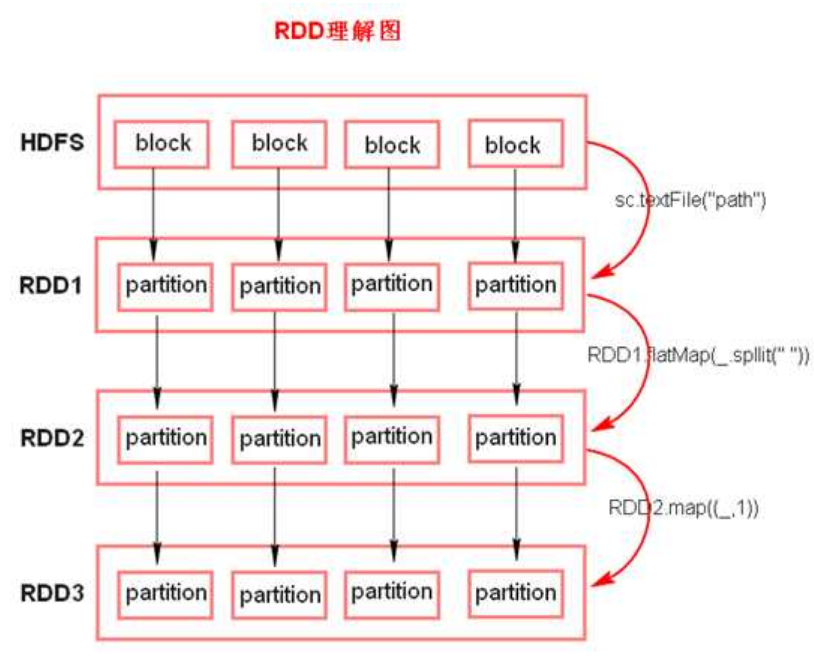
### 基本RDD“转换”运算

In [1]:
intRDD = sc.parallelize([3,1, 2, 5, 5])
intRDD.collect()

[3, 1, 2, 5, 5]

In [2]:
stringRDD = sc.parallelize(["Apple", "Orange", "Banana","Grape","Apple"])
stringRDD.collect()

['Apple', 'Orange', 'Banana', 'Grape', 'Apple']

### RDD 函数转换运算
map命令执行函数运算时，可使用“具名函数”和“匿名函数”  

<font color=red>具名函数：</font>  
先 def 定义一个函数，再将函数名称作为参数传给 map 命令，map 命令会将每个元素进行函数处理，从而形成另一个 RDD；   

由于 map 是一个“转换"运算，不会立即执行，所以后面加上 collect() “动作”运算，使之立即执行。  

<font color=red>匿名函数：</font>   
在 map 命令中，直接用 lambda 语句书写函数

In [3]:
# 具名函数
def addOne(x):
    return (x+1)

intRDD.map(addOne).collect()

[4, 2, 3, 6, 6]

In [4]:
# 匿名函数
intRDD.map(lambda  x : x + 1).collect()

[4, 2, 3, 6, 6]

In [5]:
stringRDD.map(lambda x: "fruit:"+x).collect()

['fruit:Apple', 'fruit:Orange', 'fruit:Banana', 'fruit:Grape', 'fruit:Apple']

In [6]:
stringRDD.filter(lambda x : "ra" in  x ).collect()

['Orange', 'Grape']

In [7]:
intRDD.filter(lambda x : x < 3).collect()

[1, 2]

In [8]:
intRDD.filter(lambda x : x == 3).collect()

[3]

In [9]:
intRDD.filter(lambda x : 1< x and x <5  ).collect()

[3, 2]

In [10]:
intRDD.filter(lambda x : x >=5 or x<3 ).collect()

[1, 2, 5, 5]

In [11]:
intRDD.distinct().collect()

[3, 1, 2, 5]

In [12]:
stringRDD.distinct().collect()

['Apple', 'Orange', 'Banana', 'Grape']

randomSplit() 可以将整个集合元素以随机数的方式，按比例分成多个RDD

In [13]:
sRDD = intRDD.randomSplit([0.4,0.6])

原intRDD数集有5个元素，按0.4\*5=2，0.6\*5=3，分成2个RDD【0】【1】

In [14]:
sRDD[0].collect()

[]

In [15]:
sRDD[1].collect()

[3, 1, 2, 5, 5]

使用 groupBy() 将数集分为奇数与偶数

In [16]:
gRDD=intRDD.groupBy(lambda x:"even" if (x % 2 == 0) else "odd").collect()

In [17]:
gRDD

[('odd', <pyspark.resultiterable.ResultIterable at 0x7f91184f0dd8>),
 ('even', <pyspark.resultiterable.ResultIterable at 0x7f91184f0e10>)]

In [18]:
print (gRDD[0][0],sorted(gRDD[0][1]))

odd [1, 3, 5, 5]


In [19]:
print (gRDD[1][0],sorted(gRDD[1][1]))

even [2]


### 多个RDD“转换”运算

In [20]:
intRDD1 = sc.parallelize([3, 1, 2, 5, 5])
intRDD2 = sc.parallelize([5, 6])
intRDD3 = sc.parallelize([2, 7])

In [21]:
intRDD1.collect()

[3, 1, 2, 5, 5]

In [22]:
intRDD2.collect()

[5, 6]

In [23]:
intRDD3.collect()

[2, 7]

union() 并集运算

In [24]:
intRDD1.union(intRDD2).union(intRDD3).collect()

[3, 1, 2, 5, 5, 5, 6, 2, 7]

intersection() 交集运算

In [25]:
intRDD1.intersection(intRDD2).collect()

[5]

substract() 差集运算

In [26]:
intRDD1.subtract(intRDD2).collect()

[2, 3, 1]

cartesian() 笛卡尔积运算：点与点配对，5\*2=10组数据

In [27]:
print(intRDD1.cartesian(intRDD2).collect())

[(3, 5), (3, 6), (1, 5), (1, 6), (2, 5), (2, 6), (5, 5), (5, 6), (5, 5), (5, 6)]


### RDD基本“动作”运算

Step1 读取元素

In [28]:
intRDD.collect()

[3, 1, 2, 5, 5]

In [29]:
intRDD.first()

3

In [30]:
intRDD.take(2)

[3, 1]

In [31]:
intRDD.takeOrdered(3)

[1, 2, 3]

从大到小排序，取出前3项

In [32]:
intRDD.takeOrdered(3,key=lambda x: -x)

[5, 5, 3]

统计性描述

In [33]:
intRDD.stats()

(count: 5, mean: 3.2, stdev: 1.6, max: 5.0, min: 1.0)

In [34]:
intRDD.count()

5

In [35]:
intRDD.sum()

16

### RDD Key-Value 基本“转换”运算

In [36]:
kvRDD1 = sc.parallelize([(3, 4), (3, 6), (5, 6), (1, 2)])
kvRDD1.collect()

[(3, 4), (3, 6), (5, 6), (1, 2)]

In [37]:
kvRDD1.keys().collect()

[3, 3, 5, 1]

In [38]:
kvRDD1.values().collect()

[4, 6, 6, 2]

In [39]:
kvRDD1.filter(lambda keyValue: keyValue[0] < 5).collect()

[(3, 4), (3, 6), (1, 2)]

In [40]:
kvRDD1.filter(lambda keyValue: keyValue[1] < 5).collect()

[(3, 4), (1, 2)]

In [41]:
kvRDD1.mapValues(lambda x : x * x).collect()

[(3, 16), (3, 36), (5, 36), (1, 4)]

In [42]:
kvRDD1.sortByKey(ascending=True).collect()

[(1, 2), (3, 4), (3, 6), (5, 6)]

In [43]:
kvRDD1.sortByKey().collect()

[(1, 2), (3, 4), (3, 6), (5, 6)]

In [44]:
kvRDD1.sortByKey(ascending=False).collect()

[(5, 6), (3, 4), (3, 6), (1, 2)]

<font color=red>reduceByKey()</font> 指令按 Key 进行 reduce 运算

In [45]:
kvRDD1.reduceByKey(lambda x ,y: x+y).collect()

[(3, 10), (5, 6), (1, 2)]

### 多个RDD Key-Value“转换”运算

In [46]:
kvRDD1 = sc.parallelize([(3, 4), (3, 6), (5, 6), (1, 2)])
kvRDD2 = sc.parallelize([(3, 8)])

In [47]:
kvRDD1.collect()

[(3, 4), (3, 6), (5, 6), (1, 2)]

In [48]:
kvRDD2.collect()

[(3, 8)]

join() 将2个RDD，按相同 Key 值 join 起来

In [49]:
kvRDD1.join(kvRDD2).collect()

[(3, (4, 8)), (3, (6, 8))]

leftOuterJoin() 将左边的集合，对应到右边的集合，若 Key相同，则合并，若不同，显示左边集合的 Key,(value,None)

In [50]:
kvRDD1.leftOuterJoin(kvRDD2).collect()

[(3, (4, 8)), (3, (6, 8)), (5, (6, None)), (1, (2, None))]

rightOuterJoin() 将右边的集合，对应到左边的集合，若 Key相同，则合并，若不同，显示右边集合的 Key,(value,None)

In [51]:
kvRDD1.rightOuterJoin(kvRDD2).collect()

[(3, (4, 8)), (3, (6, 8))]

subtractByKey() 删除相同 Key 值的数据

In [52]:
kvRDD1.subtractByKey(kvRDD2).collect()

[(5, 6), (1, 2)]

### Key-Value “动作”运算

In [53]:
kvRDD1.collect()

[(3, 4), (3, 6), (5, 6), (1, 2)]

In [54]:
kvRDD1.first()

(3, 4)

In [55]:
kvRDD1.take(2)

[(3, 4), (3, 6)]

In [56]:
kvFirst=kvRDD1.first()
kvFirst

(3, 4)

In [57]:
kvFirst[0]

3

countByKey() 计算数集中 Key 值的项数，动作指令，立即执行

In [58]:
kvRDD1.countByKey()

defaultdict(int, {3: 2, 5: 1, 1: 1})

collectAsMap()创建 Key-Value字典，动作指令，立即执行

In [59]:
KV=kvRDD1.collectAsMap()
KV

{3: 6, 5: 6, 1: 2}

In [60]:
type(KV)

dict

用 Key 索引 Value

In [61]:
KV[3] #用 Key 索引 Value

6

In [62]:
type(kvRDD1)

pyspark.rdd.RDD

In [63]:
kvRDD1.lookup(3) # RDD数集用 Key 索引 Value

[4, 6]

### Broadcast 广播变量

In [64]:
kvFruit = sc.parallelize([(1, "apple"), (2, "orange"), 
                          (3, "banana"), (4, "grape")])

In [65]:
fruitMap=kvFruit.collectAsMap()
print("字典："+str(fruitMap))
type(fruitMap)

字典：{1: 'apple', 2: 'orange', 3: 'banana', 4: 'grape'}


dict

In [66]:
fruitIds=sc.parallelize([2,4,1,3])
print("水果编号："+str(fruitIds.collect()),)

水果编号：[2, 4, 1, 3]


In [67]:
print("使用字典进行转换=>")
fruitNames= fruitIds.map(lambda x : fruitMap[x]).collect() # x为key
print("水果名称："+str(fruitNames))

使用字典进行转换=>
水果名称：['orange', 'grape', 'apple', 'banana']


将 fruitMap 字典转换为 bcFruitMap 广播变量

In [68]:
bcFruitMap=sc.broadcast(fruitMap)
type(bcFruitMap)

pyspark.broadcast.Broadcast

In [69]:
print("使用Broadcast 广播变量字典进行转换=>")
fruitNames= fruitIds.map(lambda x : bcFruitMap.value[x] ).collect()
print("水果名称："+str(fruitNames))

使用Broadcast 广播变量字典进行转换=>
水果名称：['orange', 'grape', 'apple', 'banana']


### accumulator累加器

In [70]:
intRDD = sc.parallelize([3,1, 2, 5, 5])

创建 total 累加器，初始值 0.0，Double / float 类型

In [71]:
total = sc.accumulator(0.0)

创建 num 累加器，初始值 0，int 类型

In [72]:
num = sc.accumulator(0)

total 累加 intRDD 元素的值，num 累加 intRDD 元素的数量

In [73]:
intRDD.foreach(lambda  i:  [total.add(i) , num.add(1)])

In [74]:
avg = total.value / num.value        
print("total="+str(total.value)+", num="+str(num.value)+", avg="+str(avg))

total=16.0, num=5, avg=3.2


### RDD Persistence持久化

In [75]:
intRddMemory = sc.parallelize([3,1, 2, 5, 5])

RDD.persist() 存储等级默认 <font color=red>StorageLevel.MEMORY_ONLY</font> ，即存储在内存中，提高运算效率，若 RDD 太大，无法完全存储在内存中，则多余的 RDD partition 不进行缓存，而是需要时再进行重新计算。

In [76]:
intRddMemory.persist() # 默认 MEMORY_ONLY

ParallelCollectionRDD[118] at readRDDFromFile at PythonRDD.scala:262

In [77]:
intRddMemory.is_cached #查看是否已经 cashed 缓存

True

In [78]:
intRddMemory.unpersist() # 取消持久化

ParallelCollectionRDD[118] at readRDDFromFile at PythonRDD.scala:262

In [79]:
intRddMemory.is_cached

False

RDD.persist() 存储等级 <font color=red>StorageLevel.MEMORY_AND_DISK</font> 如果RDD太大，无法完全存储在内存Memory中，则多余的RDD partition 存储在硬盘 Disk 中。

In [80]:
 intRddMemoryAndDisk = sc.parallelize([3,1, 2, 5, 5])

In [81]:
from pyspark import StorageLevel

In [82]:
intRddMemoryAndDisk.persist(StorageLevel.MEMORY_AND_DISK) # 设置存储等级

ParallelCollectionRDD[119] at readRDDFromFile at PythonRDD.scala:262

In [83]:
intRddMemoryAndDisk.is_cached

True

### <font color=red>实战：使用 Spark 建立 WordCount 项目 </font>

In [84]:
%pwd # 查看当前工作路径

'/media/sf_Data-science/Hadoop+Spark/pythonsparkexample/ipynotebook'

In [85]:
# 使用 sc.textFile 读取文件
textFile = sc.textFile("file:/home/lotbear/pythonwork/data/fruit_test.txt")
print('查看textFile信息:')
print(textFile)
print(' ')
print('查看textFile类型:')
print(type(textFile))
print(' ')
print('查看textFile数据内容：')
textFile.collect()

查看textFile信息:
file:/home/lotbear/pythonwork/data/fruit_test.txt MapPartitionsRDD[121] at textFile at NativeMethodAccessorImpl.java:0
 
查看textFile类型:
<class 'pyspark.rdd.RDD'>
 
查看textFile数据内容：


['Apple Apple Orange', 'Banana Grape Grape']

flatMap  取出每一个单词,并且平铺

In [86]:
stringRDD=textFile.flatMap(lambda line : line.split(" "))
print('查看stringRDD信息:')
print(stringRDD)
print(' ')
print('查看stringRDD类型')
print(type(stringRDD))
print(' ')
print('查看stringRDD数据内容:')
stringRDD.collect()

查看stringRDD信息:
PythonRDD[122] at RDD at PythonRDD.scala:53
 
查看stringRDD类型
<class 'pyspark.rdd.PipelinedRDD'>
 
查看stringRDD数据内容:


['Apple', 'Apple', 'Orange', 'Banana', 'Grape', 'Grape']

In [87]:
stringRDD.map(lambda word:(word,1)).collect()

[('Apple', 1),
 ('Apple', 1),
 ('Orange', 1),
 ('Banana', 1),
 ('Grape', 1),
 ('Grape', 1)]

In [88]:
countsRDD=stringRDD.map(lambda word:(word,1)).reduceByKey(lambda x,y:x+y)
print('查看countsRDD信息:')
print(countsRDD)
print(' ')
print('查看countsRDD类型')
print(type(countsRDD))
print(' ')
print('查看countsRDD数据内容:')
countsRDD.collect()

查看countsRDD信息:
PythonRDD[128] at RDD at PythonRDD.scala:53
 
查看countsRDD类型
<class 'pyspark.rdd.PipelinedRDD'>
 
查看countsRDD数据内容:


[('Apple', 2), ('Orange', 1), ('Banana', 1), ('Grape', 2)]

In [94]:
%rm -R /home/lotbear/pythonwork/data/output # 先确保输出路径上文件为空
countsRDD.saveAsTextFile("file:/home/lotbear/pythonwork/data/output")

In [95]:
%ll ~/pythonwork/data/output # 查看目录

总用量 4
-rw-r--r-- 1 lotbear 54 12月 18 23:16 part-00000
-rw-r--r-- 1 lotbear  0 12月 18 23:16 _SUCCESS


In [96]:
%cat ~/pythonwork/data/output/part-00000 # 查看文件具体内容

('Apple', 2)
('Orange', 1)
('Banana', 1)
('Grape', 2)
